In [1]:
using GrootSim

using CSV
using DataFrames
using Dates
using DotEnv
DotEnv.load!()
using PyPlot
using Serialization
using SimpleHypergraphs
using Statistics

using PyCall
pickle = pyimport("pickle");

## Get the most active users
This translates into selecting only the users with at least 2 actions

In [2]:
basepath = ENV["BASEPATH"]
datapath = ENV["DATA_PATH"]
data_to_include_path = ENV["DATA_TO_INCLUDE_PATH"];
precomputed_params_path = ENV["PRECOMPUTED_PARAMS_PATH"];

In [3]:
reddittors_to_include = Set(pickle.load(open(joinpath(data_to_include_path, "final_users_to_include.pkl"))))
subs_to_include = (pickle.load(open(joinpath(data_to_include_path, "final_subs_to_include.pkl"))))
subs_to_include = Set([sub_id[4:end] for sub_id in subs_to_include]);

In [32]:
subreddit = nothing #"California_news" #"collapse_news_politics"
subreddits_to_include =  nothing #Set{String}(split(subreddit, "_")) 

In [33]:
# * opinion creation from ground-truth
user_opinions = get_true_user_stance(
    datapath,
    subs_to_include,
    reddittors_to_include;
    subreddits_to_include=subreddits_to_include
);

subreddit_name: AskReddit
subreddit_name: California
subreddit_name: bayarea
subreddit_name: collapse
subreddit_name: news
subreddit_name: politics


In [34]:
length(user_opinions)

43861

In [35]:
# * get most active users
most_active_users = [user for (user, opinions) in user_opinions if length(opinions) > 2]
length(most_active_users)

14673

In [ ]:
# serialize(joinpath(precomputed_path, "most_active_users.ser"), most_active_users)

## Load diffusion results

In [24]:
# result-related paths
result_path = ENV["RESULTS_BASEPATH"]
subreddits = "all"

day_params_path = joinpath(precomputed_params_path, "day", subreddits)
sim_result_path = joinpath(result_path, "simulation", "temporal", "simulation_data", "day", subreddits)

hg_sim_result_path = joinpath(sim_result_path, "hg", "ser", "gt")
clique_sim_result_path = joinpath(sim_result_path, "clique", "ser", "gt")
graph_sim_result_path = joinpath(sim_result_path, "graph", "ser", "gt")
;

In [14]:
active_intervals_per_user = deserialize(joinpath(day_params_path, "active_intervals_per_user.ser"));

In [25]:
# load hg-related data
hi_hg = deserialize(joinpath(hg_sim_result_path, "2023-06-29T21-23_id1_NonLinearConsensus_opinion_history_all.ser"))
mi_hg = deserialize(joinpath(hg_sim_result_path, "2023-06-29T23-18_id2_NonLinearConsensus_opinion_history_all.ser"))
li_hg = deserialize(joinpath(hg_sim_result_path, "2023-06-30T01-13_id3_NonLinearConsensus_opinion_history_all.ser"))

hi_hg_iter = deserialize(joinpath(hg_sim_result_path, "2023-06-29T21-23_id1_NonLinearConsensus_iters.ser"))
mi_hg_iter = deserialize(joinpath(hg_sim_result_path, "2023-06-29T23-18_id2_NonLinearConsensus_iters.ser"))
li_hg_iter = deserialize(joinpath(hg_sim_result_path, "2023-06-30T01-13_id3_NonLinearConsensus_iters.ser"))
;

In [26]:
# load clique-related data
hi_c = deserialize(joinpath(clique_sim_result_path, "2023-07-05T18-04_id1_clique_NonLinearConsensus_opinion_history_all.ser"))
mi_c = deserialize(joinpath(clique_sim_result_path, "2023-07-05T20-03_id2_clique_NonLinearConsensus_opinion_history_all.ser"))
li_c = deserialize(joinpath(clique_sim_result_path, "2023-07-05T22-04_id3_clique_NonLinearConsensus_opinion_history_all.ser"))

hi_c_iter = deserialize(joinpath(clique_sim_result_path, "2023-07-05T18-04_id1_clique_NonLinearConsensus_iters.ser"))
mi_c_iter = deserialize(joinpath(clique_sim_result_path, "2023-07-05T20-03_id2_clique_NonLinearConsensus_iters.ser"))
li_c_iter = deserialize(joinpath(clique_sim_result_path, "2023-07-05T22-04_id3_clique_NonLinearConsensus_iters.ser"))
;

In [28]:
# load graph-related data
hi_g = deserialize(joinpath(graph_sim_result_path, "2023-07-14T18-28_id1_graph_NonLinearConsensus_opinion_history_all.ser"))
mi_g = deserialize(joinpath(graph_sim_result_path, "2023-07-14T20-23_id2_graph_NonLinearConsensus_opinion_history_all.ser"))
li_g = deserialize(joinpath(graph_sim_result_path, "2023-07-14T22-19_id3_graph_NonLinearConsensus_opinion_history_all.ser"))

hi_g_iter = deserialize(joinpath(graph_sim_result_path, "2023-07-14T18-28_id1_graph_NonLinearConsensus_iters.ser"))
mi_g_iter = deserialize(joinpath(graph_sim_result_path, "2023-07-14T20-23_id2_graph_NonLinearConsensus_iters.ser"))
li_g_iter = deserialize(joinpath(graph_sim_result_path, "2023-07-14T22-19_id3_graph_NonLinearConsensus_iters.ser"))
;

## Plot diffusion results - aligned timelines (last opinion, avg opinion)

In [ ]:
figure, axis = subplots(3, 3, figsize=(15, 10))

axis[1,1].set_title("High involvement")
axis[1,2].set_title("Medium involvement")
axis[1,3].set_title("Low involvement")

axis[1,1].set_ylabel("Hypergraph \n Node opinion")
axis[2,1].set_ylabel("Clique \n Node opinion")
axis[3,1].set_ylabel("Graph \n Node opinion")

axis[3,1].set_xlabel("Iteration")
axis[3,2].set_xlabel("Iteration")
axis[3,3].set_xlabel("Iteration")
;

In [ ]:
figure_avg, axis_avg = subplots(3, 3, figsize=(15, 10))

axis_avg[1,1].set_title("High involvement - Avg")
axis_avg[1,2].set_title("Medium involvement - Avg")
axis_avg[1,3].set_title("Low involvement - Avg")

axis_avg[1,1].set_ylabel("Hypergraph \n Node opinion")
axis_avg[2,1].set_ylabel("Clique \n Node opinion")
axis_avg[3,1].set_ylabel("Graph \n Node opinion")

axis_avg[3,1].set_xlabel("Iteration")
axis_avg[3,2].set_xlabel("Iteration")
axis_avg[3,3].set_xlabel("Iteration")
;

In [38]:
# HYPERGRAPH
for user in most_active_users
    # HIGH INVOLVEMENT
    op_to_plot = get_last_opinions(hi_hg[user], hi_hg_iter, active_intervals_per_user[user])
    op_to_plot_avg = get_average_opinions(hi_hg[user], hi_hg_iter, active_intervals_per_user[user])

    axis[1,1].plot(op_to_plot, color="black", linewidth=.3)
    axis_avg[1,1].plot(op_to_plot_avg, color="black", linewidth=.3)

    # MEDIUM INVOLVEMENT
    op_to_plot = get_last_opinions(mi_hg[user], mi_hg_iter, active_intervals_per_user[user])
    op_to_plot_avg = get_average_opinions(mi_hg[user], mi_hg_iter, active_intervals_per_user[user])

    axis[1,2].plot(op_to_plot, color="black", linewidth=.3)
    axis_avg[1,2].plot(op_to_plot_avg, color="black", linewidth=.3)

    # LOW INVOLVEMENT
    op_to_plot = get_last_opinions(li_hg[user], li_hg_iter, active_intervals_per_user[user])
    op_to_plot_avg = get_average_opinions(li_hg[user], li_hg_iter, active_intervals_per_user[user])

    axis[1,3].plot(op_to_plot, color="black", linewidth=.3)
    axis_avg[1,3].plot(op_to_plot_avg, color="black", linewidth=.3)
end

In [39]:
# clique
for user in most_active_users
    # HIGH INVOLVEMENT
    op_to_plot = get_last_opinions(hi_c[user], hi_c_iter, active_intervals_per_user[user])
    op_to_plot_avg = get_average_opinions(hi_c[user], hi_c_iter, active_intervals_per_user[user])

    axis[2,1].plot(op_to_plot, color="black", linewidth=.3)
    axis_avg[2,1].plot(op_to_plot_avg, color="black", linewidth=.3)

    # MEDIUM INVOLVEMENT
    op_to_plot = get_last_opinions(mi_c[user], mi_c_iter, active_intervals_per_user[user])
    op_to_plot_avg = get_average_opinions(mi_c[user], mi_c_iter, active_intervals_per_user[user])

    axis[2,2].plot(op_to_plot, color="black", linewidth=.3)
    axis_avg[2,2].plot(op_to_plot_avg, color="black", linewidth=.3)

    # LOW INVOLVEMENT
    op_to_plot = get_last_opinions(li_c[user], li_c_iter, active_intervals_per_user[user])
    op_to_plot_avg = get_average_opinions(li_c[user], li_c_iter, active_intervals_per_user[user])

    axis[2,3].plot(op_to_plot, color="black", linewidth=.3)
    axis_avg[2,3].plot(op_to_plot_avg, color="black", linewidth=.3)
end

In [40]:
# graph
for user in most_active_users
    # HIGH INVOLVEMENT
    op_to_plot = get_last_opinions(hi_g[user], hi_g_iter, active_intervals_per_user[user])
    op_to_plot_avg = get_average_opinions(hi_g[user], hi_g_iter, active_intervals_per_user[user])

    axis[3,1].plot(op_to_plot, color="black", linewidth=.3)
    axis_avg[3,1].plot(op_to_plot_avg, color="black", linewidth=.3)

    # MEDIUM INVOLVEMENT
    op_to_plot = get_last_opinions(mi_g[user], mi_g_iter, active_intervals_per_user[user])
    op_to_plot_avg = get_average_opinions(mi_g[user], mi_g_iter, active_intervals_per_user[user])

    axis[3,2].plot(op_to_plot, color="black", linewidth=.3)
    axis_avg[3,2].plot(op_to_plot_avg, color="black", linewidth=.3)

    # LOW INVOLVEMENT
    op_to_plot = get_last_opinions(li_g[user], li_g_iter, active_intervals_per_user[user])
    op_to_plot_avg = get_average_opinions(li_g[user], li_g_iter, active_intervals_per_user[user])

    axis[3,3].plot(op_to_plot, color="black", linewidth=.3)
    axis_avg[3,3].plot(op_to_plot_avg, color="black", linewidth=.3)
end

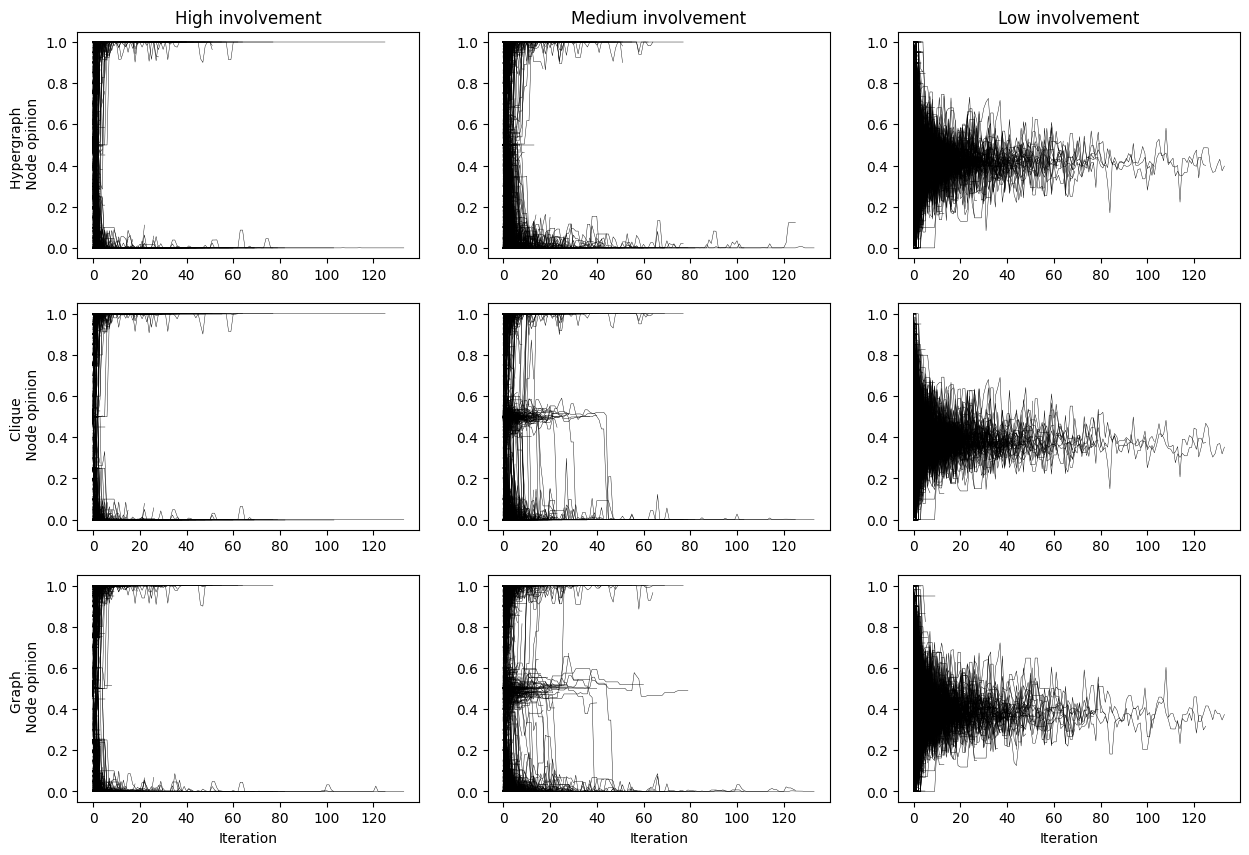

In [41]:
# last opinion in the interval
figure 

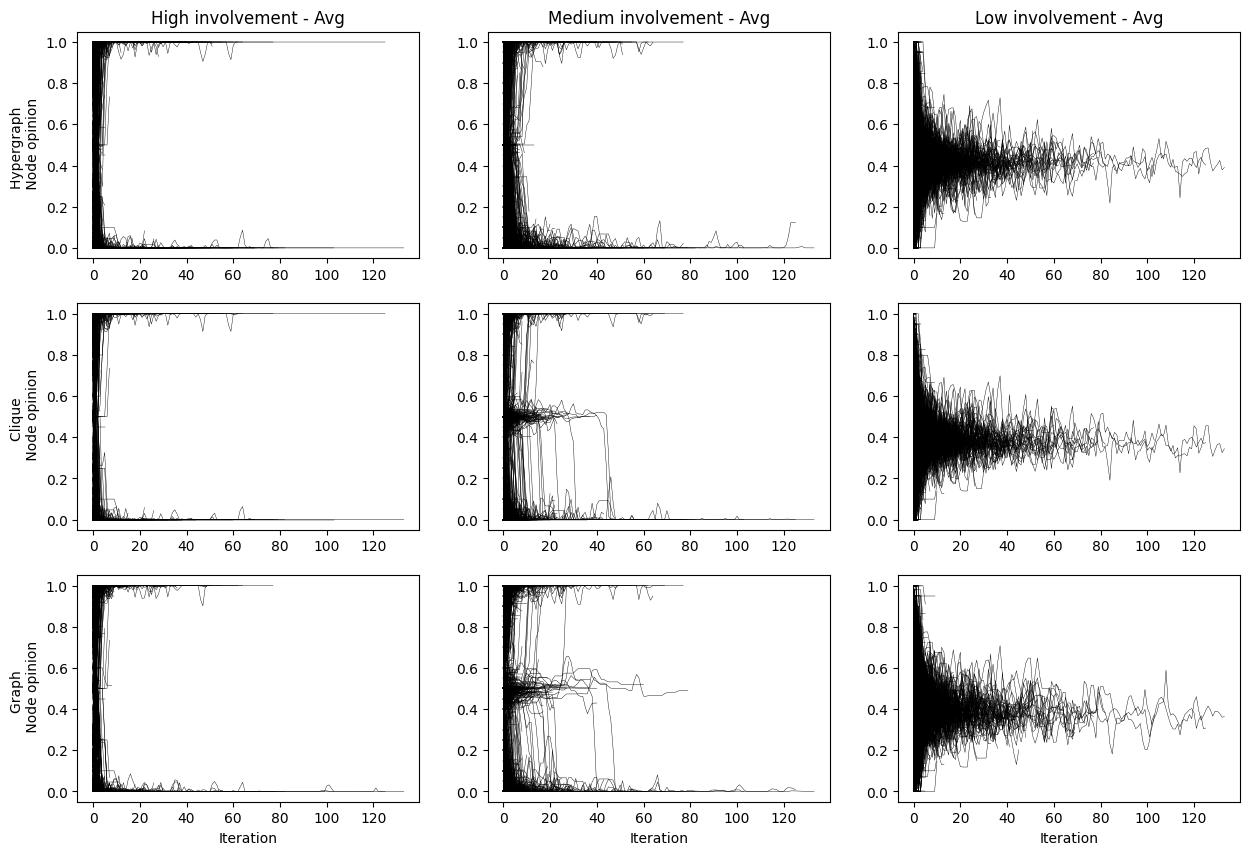

In [42]:
# average opinion in the interval
figure_avg